In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df = pd.read_csv("data/exp4/limiting_data.csv")
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,b,d_model,...,dropout,lr,model,n_layer,n_params,weight_decay,loss,test acc,train acc,val acc
0,MambaModel_s6_8192_1chrom[]_BIMODULE,finished,-,NaN,NaN,2024-05-10T14:24:39.000Z,1716,NaN,32,104,...,0.15,0.00025,MambaModel_s6_8192_1chrom[]_BIMODULE,6,564101,0.03,0.190818,0.883614,0.934479,0.865986
1,MambaModel_s6_8192_1chrom[]_reg,finished,-,NaN,NaN,2024-05-10T13:48:34.000Z,1026,NaN,32,116,...,0.15,0.00025,MambaModel_s6_8192_1chrom[],6,586037,0.03,0.218588,0.858574,0.925736,0.848558
2,MambaModel_s6_8192_1chrom[]_pretrained,finished,-,NaN,NaN,2024-05-10T13:20:00.000Z,1038,NaN,32,116,...,0.15,0.00025,MambaModel_s6_8192_1chrom[]_pretrained,6,586037,0.03,0.197027,0.849159,0.931818,0.837941
3,MambaModel_s6_8192_2mil[]_BIMODULE,finished,-,NaN,NaN,2024-05-10T02:58:21.000Z,1717,NaN,32,104,...,0.15,0.00025,MambaModel_s6_8192_2mil[]_BIMODULE,6,564101,0.03,0.032948,0.614183,0.991117,0.590745
4,MambaModel_s6_8192_2mil[]_reg,finished,-,NaN,NaN,2024-05-10T02:22:20.000Z,1022,NaN,32,116,...,0.15,0.00025,MambaModel_s6_8192_2mil[],6,586037,0.03,0.022179,0.591546,0.993278,0.560296


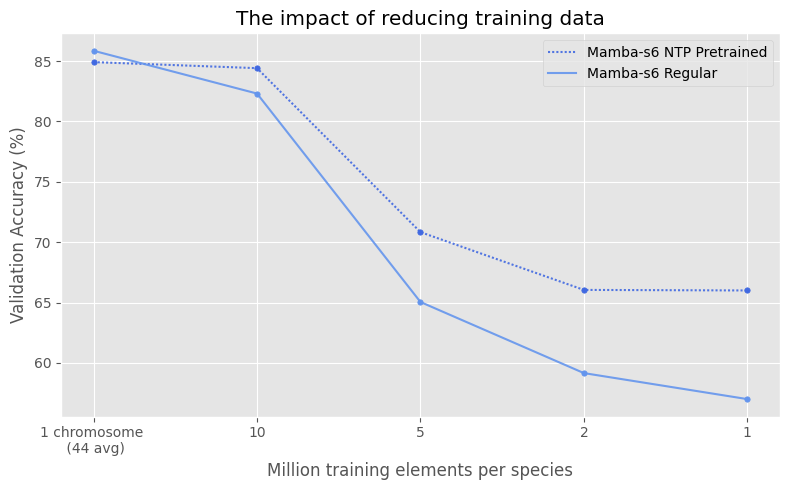

In [33]:
orders = ["1chrom", "10mil", "5mil", "2mil"]
types_ = ["pretrained", "reg"] #BIMODULE
legend_names = {"pretrained":"Mamba-s6 NTP Pretrained", "reg": "Mamba-s6 Regular"}
#colors = {"pretrained":"Pretrained", "reg": "Regular"}
names = df.Name.values
accs = df["test acc"].values
one_mil = {"BIMODULE":0.6, "pretrained":0.66, "reg":0.57}

fig, ax = plt.subplots(figsize=(8,5))
for t in types_:
   to_plot = []
   for order in orders:
      for idx, name in enumerate(names):
         if t in name and order in name:
            to_plot.append(accs[idx]*100)

   
   to_plot.append(one_mil[t]*100)
   if t == "reg":
      plt.plot(to_plot, label=legend_names[t], color="cornflowerblue", alpha=0.9)
      plt.scatter(range(len(to_plot)), to_plot,  color="cornflowerblue", s=15)
      
      #plt.plot(to_plot, label=legend_names[t], color="cornflowerblue")
   else:
      plt.plot(to_plot, label=legend_names[t], color="royalblue", linestyle=(0, (1, 1)),alpha=0.9)
      plt.scatter(range(len(to_plot)), to_plot, color="royalblue", s=15)
   

plt.xticks(list(range(len(order)+1)), ["1 chromosome \n (44 avg)", "10", "5", "2", "1"])
plt.ylabel("Validation Accuracy (%)")
plt.xlabel("Million training elements per species")
plt.title("The impact of reducing training data")
plt.legend()
plt.tight_layout()
plt.savefig("data/exp4/restricting_data.png", dpi=200)
plt.show()
         
      

In [2]:
df.Name

0       MambaModel_s6_8192_1chrom[]_BIMODULE
1                MambaModel_s6_8192_1chrom[]
2     MambaModel_s6_8192_1chrom[]_pretrained
3         MambaModel_s6_8192_2mil[]_BIMODULE
4                  MambaModel_s6_8192_2mil[]
5       MambaModel_s6_8192_2mil[]_pretrained
6        MambaModel_s6_8192_10mil[]_BIMODULE
7                 MambaModel_s6_8192_10mil[]
8      MambaModel_s6_8192_10mil[]_pretrained
9         MambaModel_s6_8192_5mil[]_BIMODULE
10                 MambaModel_s6_8192_5mil[]
11      MambaModel_s6_8192_5mil[]_pretrained
Name: Name, dtype: object